In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
from scipy import stats

from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [13]:
df = pd.read_pickle('datos/airline_cod_map.pkl')
df.head(5)

,satisfaccion,genero,tipo_de_cliente,clase,comfort_asiento,comida_y_bebida,ubicación_puerta_embarque,ocio_vuelo,soporte_online,facilidad_reserva_online,servicio_durante_el_vuelo,manejo_equipaje,facturacion,limpieza,embarque_online,retraso_salida_minutos,puntualidad_Insatisfecho,puntualidad_Muy satisfecho,puntualidad_Nada satisfecho,puntualidad_Neutral,puntualidad_Poco Satisfecho,puntualidad_Satisfecho
0,0,1,1,2,1,1,1,1,2,2,2,2,1,2,2,0,0,0,1,0,0,0
1,0,2,1,1,1,1,3,2,2,2,1,1,2,2,2,310,0,0,1,0,0,0
2,0,1,1,2,1,1,3,0,2,2,2,1,1,1,2,0,0,0,1,0,0,0
3,0,1,1,2,1,1,3,1,2,2,2,2,1,2,1,0,0,0,1,0,0,0
4,0,1,1,2,1,1,3,2,1,2,2,2,1,2,1,0,0,0,1,0,0,0


En el ejercicio de pair programming anterior ajustastéis vuestro primer modelito de regresión logística. Ahora es el momento de saber como de bueno es nuestro modelo. Para esto, los objetivos del pair de hoy son:
-Calculad las métricas para vuestro modelo
-Interpretad las métricas obtenidas, ¿es un buen modelo? ¿hay overfitting o underfitting?

In [14]:
#Separamos x e y
X1 = df.drop("satisfaccion", axis = 1)
y1 = df["satisfaccion"]

In [15]:
# comprobamos que tenemos en X, deberíamos tener todas nuestras variables predictoras

X1.head()

,genero,tipo_de_cliente,clase,comfort_asiento,comida_y_bebida,ubicación_puerta_embarque,ocio_vuelo,soporte_online,facilidad_reserva_online,servicio_durante_el_vuelo,manejo_equipaje,facturacion,limpieza,embarque_online,retraso_salida_minutos,puntualidad_Insatisfecho,puntualidad_Muy satisfecho,puntualidad_Nada satisfecho,puntualidad_Neutral,puntualidad_Poco Satisfecho,puntualidad_Satisfecho
0,1,1,2,1,1,1,1,2,2,2,2,1,2,2,0,0,0,1,0,0,0
1,2,1,1,1,1,3,2,2,2,1,1,2,2,2,310,0,0,1,0,0,0
2,1,1,2,1,1,3,0,2,2,2,1,1,1,2,0,0,0,1,0,0,0
3,1,1,2,1,1,3,1,2,2,2,2,1,2,1,0,0,0,1,0,0,0
4,1,1,2,1,1,3,2,1,2,2,2,1,2,1,0,0,0,1,0,0,0


In [16]:
# comprobamos que tenemos en la y, deberíamos tener la variable respuesta

y1.head()

0    0
1    0
2    0
3    0
4    0
Name: satisfaccion, dtype: int64

In [17]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [18]:
os_us = SMOTETomek()
X_train_res, y_train_res = os_us.fit_resample(x_train1, y_train1)

In [19]:
os_us = SMOTETomek()
X_test_bal, y_test_bal = os_us.fit_resample(x_test1, y_test1)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

log_reg_esta.fit(X_train_res,y_train_res)

y_pred_train_esta = log_reg_esta.predict(X_train_res)

y_pred_test_esta = log_reg_esta.predict(X_test_bal)

In [22]:
train_df_esta = pd.DataFrame({'Real': y_train_res, 'Predicted': y_pred_train_esta, 'Set': ['Train']*len(y_train_res)})
test_df_esta  = pd.DataFrame({'Real': y_test_bal,  'Predicted': y_pred_test_esta,  'Set': ['Test']*len(y_test_bal)})
resultados = pd.concat([train_df_esta,test_df_esta], axis = 0)
resultados.head()

,Real,Predicted,Set
0,0,0,Train
1,1,1,Train
2,1,0,Train
3,1,1,Train
4,1,1,Train


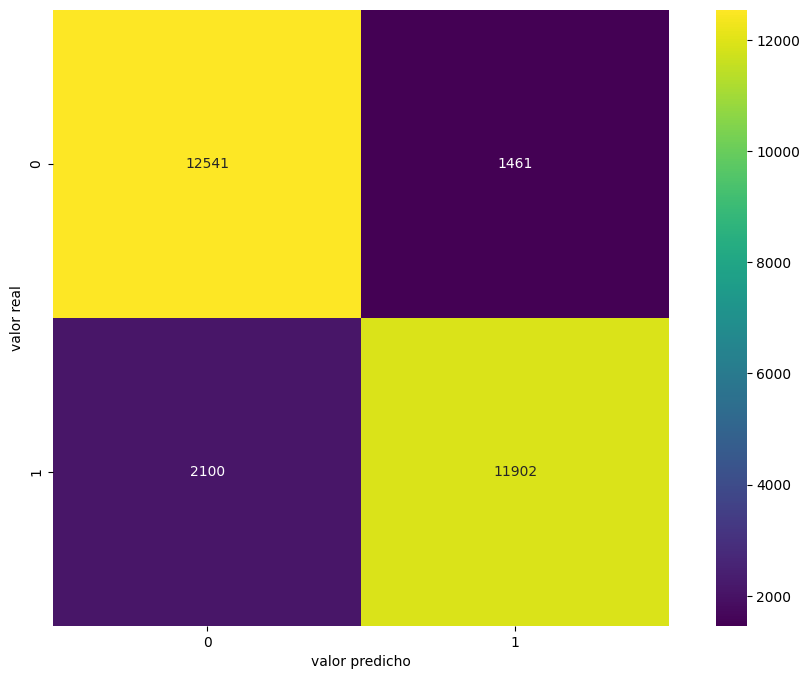

In [23]:
mat_lr = confusion_matrix(y_test_bal, y_pred_test_esta)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score

In [25]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [26]:
results_logistic = metricas(y_test_bal, y_pred_test_esta, y_train_res, y_pred_train_esta, "Regresión logistica")
results_logistic

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.872840,0.890668,0.850021,0.869870,0.745679,test,Regresión logistica
1,0.868979,0.883307,0.850290,0.866484,0.737959,train,Regresión logistica


In [28]:
# guardemos este dataframe con los resultados en un csv para compararlo con otros modelos como hicimos en regresión lineal

results_logistic.to_pickle('datos/airline_results_LR.pkl')
